# WSL shot location analysis

For the 2020-2021 WSL season, how are shots distributed across teams?

In [2]:
from statsbombpy import sb
from utils.statsbomb_wrappers import Match, Season
import pandas as pd

import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


In [3]:
competitions = sb.competitions()
competitions.loc[competitions["competition_name"] == "FA Women's Super League"]

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
25,37,90,England,FA Women's Super League,female,False,False,2020/2021,2023-02-25T14:52:09.326729,2021-06-13T16:17:31.694,None,2023-02-25T14:52:09.326729
26,37,42,England,FA Women's Super League,female,False,False,2019/2020,2024-02-12T15:05:34.211400,2021-06-13T16:17:31.694,None,2024-02-12T15:05:34.211400
27,37,4,England,FA Women's Super League,female,False,False,2018/2019,2024-06-12T07:41:45.347457,2021-06-13T16:17:31.694,None,2024-06-12T07:41:45.347457


In [4]:
wsl_comp_id = 37
wsl_matches_20_21 = Season(competition_id=wsl_comp_id, season_id=90)

wsl_matches_20_21.get_matches().shape

(131, 22)

In [7]:
def plot_shots_for_season(season, team):
    matches = pd.concat(
        [season.get_matches(home_team=team), season.get_matches(away_team=team)]
    )
    shots = pd.concat(
        [
            Match(match_id=match_id).get_events(type="Shot", team=team)
            for match_id in matches["match_id"]
        ]
    )
    goals = shots.loc[shots["shot_outcome"] == "Goal"]

    pitch = Pitch(half=True, pitch_color="#000000", line_color="#ffffff", line_zorder=2)
    fig, ax = pitch.draw()

    ax.scatter(
        [shot[0] for shot in shots["location"].values],
        [shot[1] for shot in shots["location"].values],
        c=[xG for xG in shots["shot_statsbomb_xg"].values],
        s=0.5,
        cmap="autumn",
    )

    ax.scatter(
        [goal[0] for goal in goals["location"].values],
        [goal[1] for goal in goals["location"].values],
        c=[xG for xG in goals["shot_statsbomb_xg"].values],
        s=15,
        cmap="autumn",
    )

    ax.set_title(
        f"{team}, xG {sum(shots['shot_statsbomb_xg']):.2f}, goals/shots {len(goals)}/{len(shots)}"
    )

    fig.savefig(f"../docs/img/shot_location_{team}")

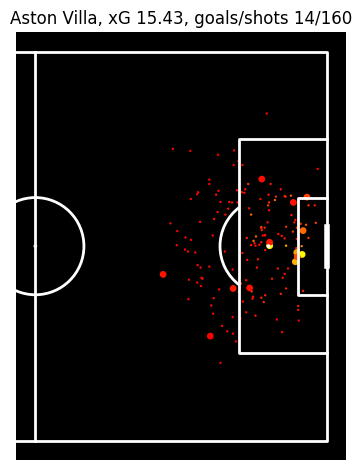

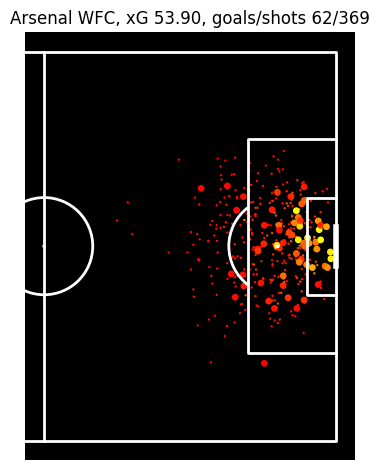

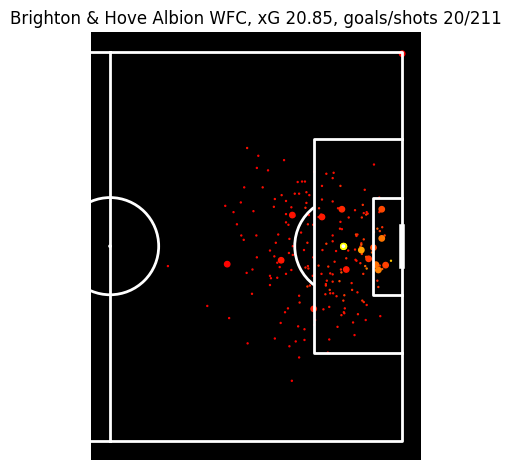

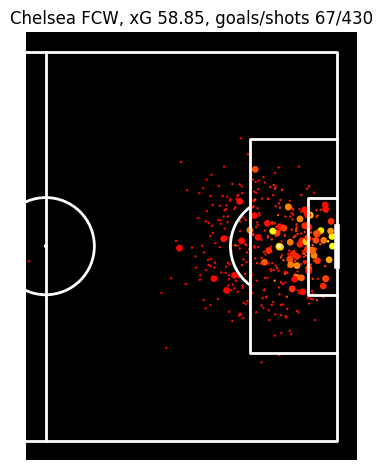

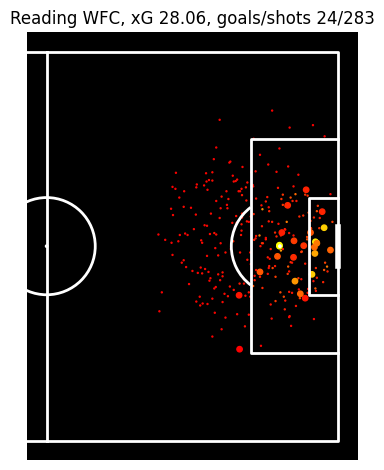

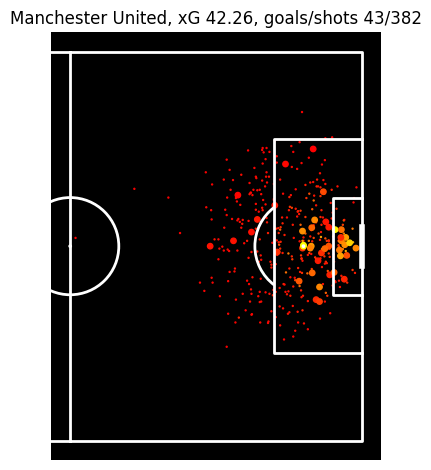

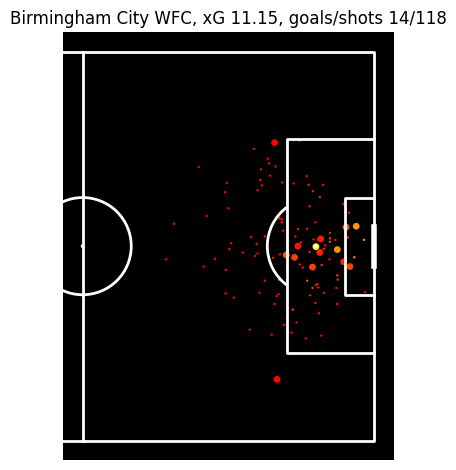

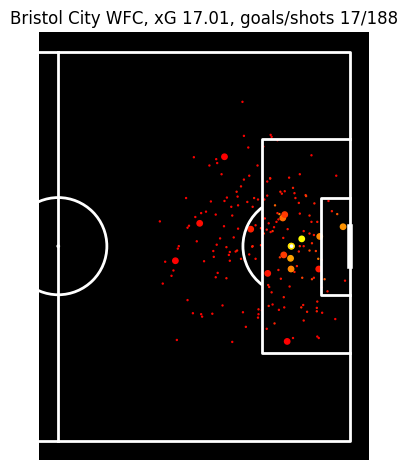

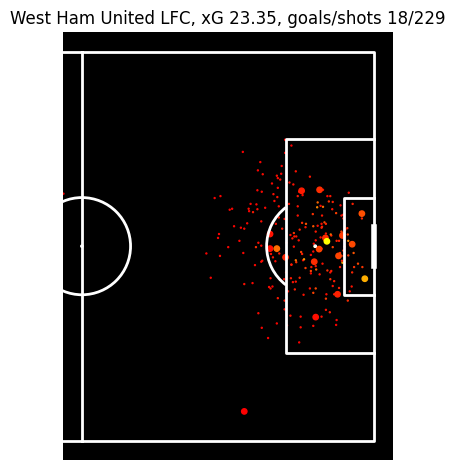

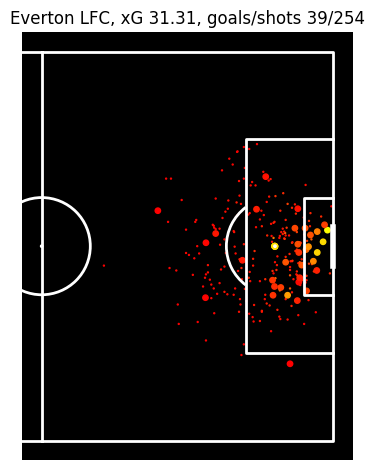

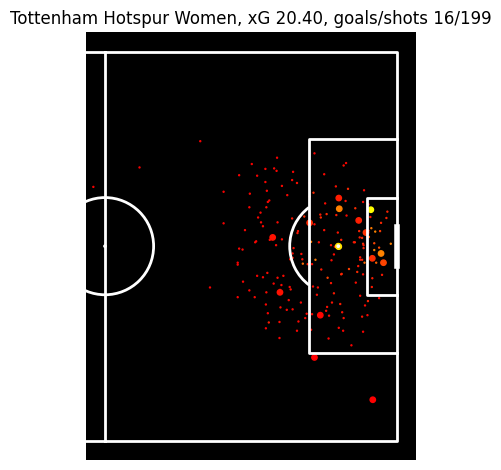

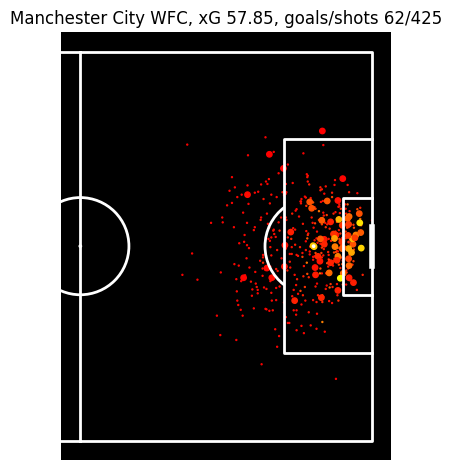

In [8]:
teams = wsl_matches_20_21.matches["home_team"].unique()

for team in teams:
    plot_shots_for_season(wsl_matches_20_21, team)